Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv("Zoo.csv")

# dropping unnecessary column 
zoo_data=df.drop("animal name",axis=1)
zoo_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
# # Impute or drop missing values as necessary
# For example, we can fill missing values with the mean of the column 
zoo_data.fillna(zoo_data.mean())

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


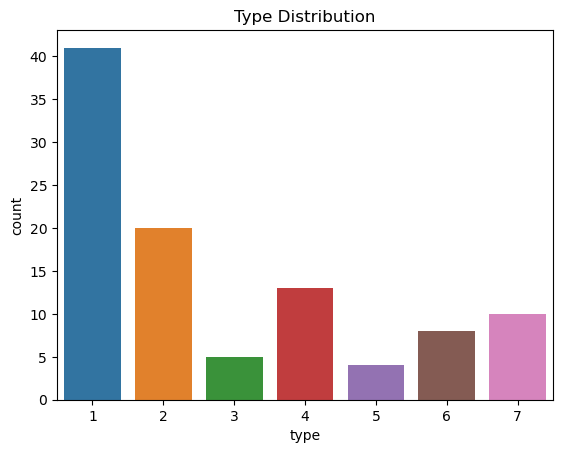

In [4]:
# Visualize the distribution of the target variable
sns.countplot(x='type', data=zoo_data)
plt.title('Type Distribution')
plt.show()

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


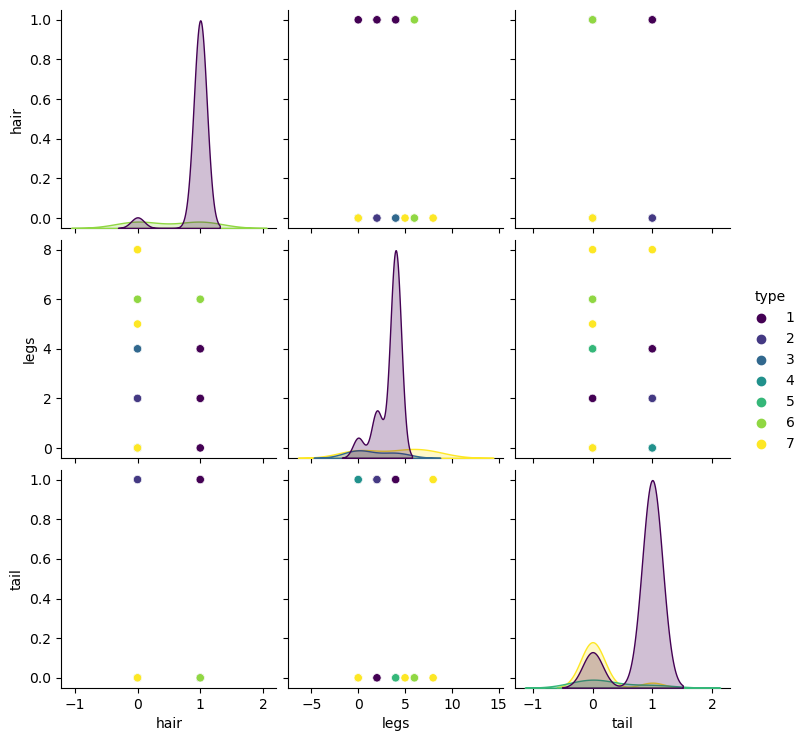

In [5]:
# Pair plot to see the relationships between features and the target variable
encoded=zoo_data[zoo_data["type"].isin([1, 2, 3, 4, 5, 6, 7])]
selected_features=['type','hair','legs','tail']
sns.pairplot(encoded[selected_features],hue="type",palette="viridis")

In [6]:
#identify the outliers 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

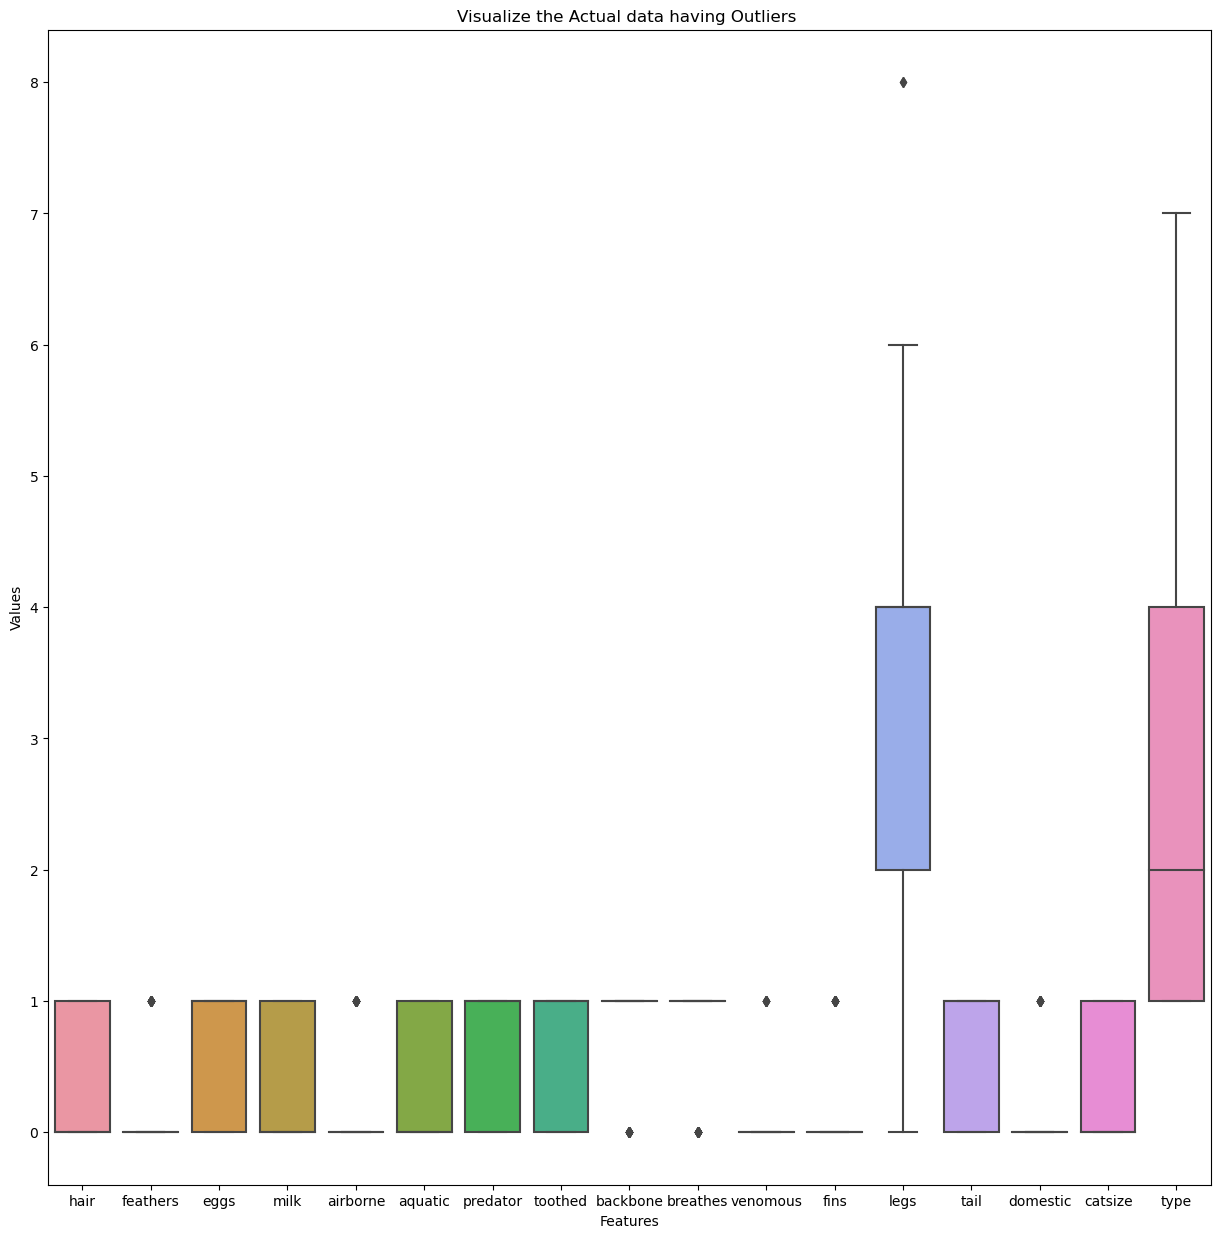

In [7]:
# visualize the Actual data having Outliers 
plt.figure(figsize=(15,15))
sns.boxplot(data=zoo_data)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title("Visualize the Actual data having Outliers ")
plt.show()

In [8]:
#Q1=df.quantile(0.25)
#Q3=df.quantile(0.75)

In [9]:
#IQR=Q3-Q1

In [10]:
#U_E=Q3+1.5*IQR
#L_E=Q1-1.5*IQR

In [11]:
#Outliers=((zoo_data<L_E) | (zoo_data>U_E))
#Outliers

In [12]:
#No_outliers=(zoo_data<U_E) & (zoo_data> L_E)
#No_outliers

In [13]:
from scipy import stats
z_scores=np.abs(stats.zscore(zoo_data.select_dtypes(include=[np.number])))
outliers=(z_scores>3).all(axis=1)
zoo_data=zoo_data[~outliers]

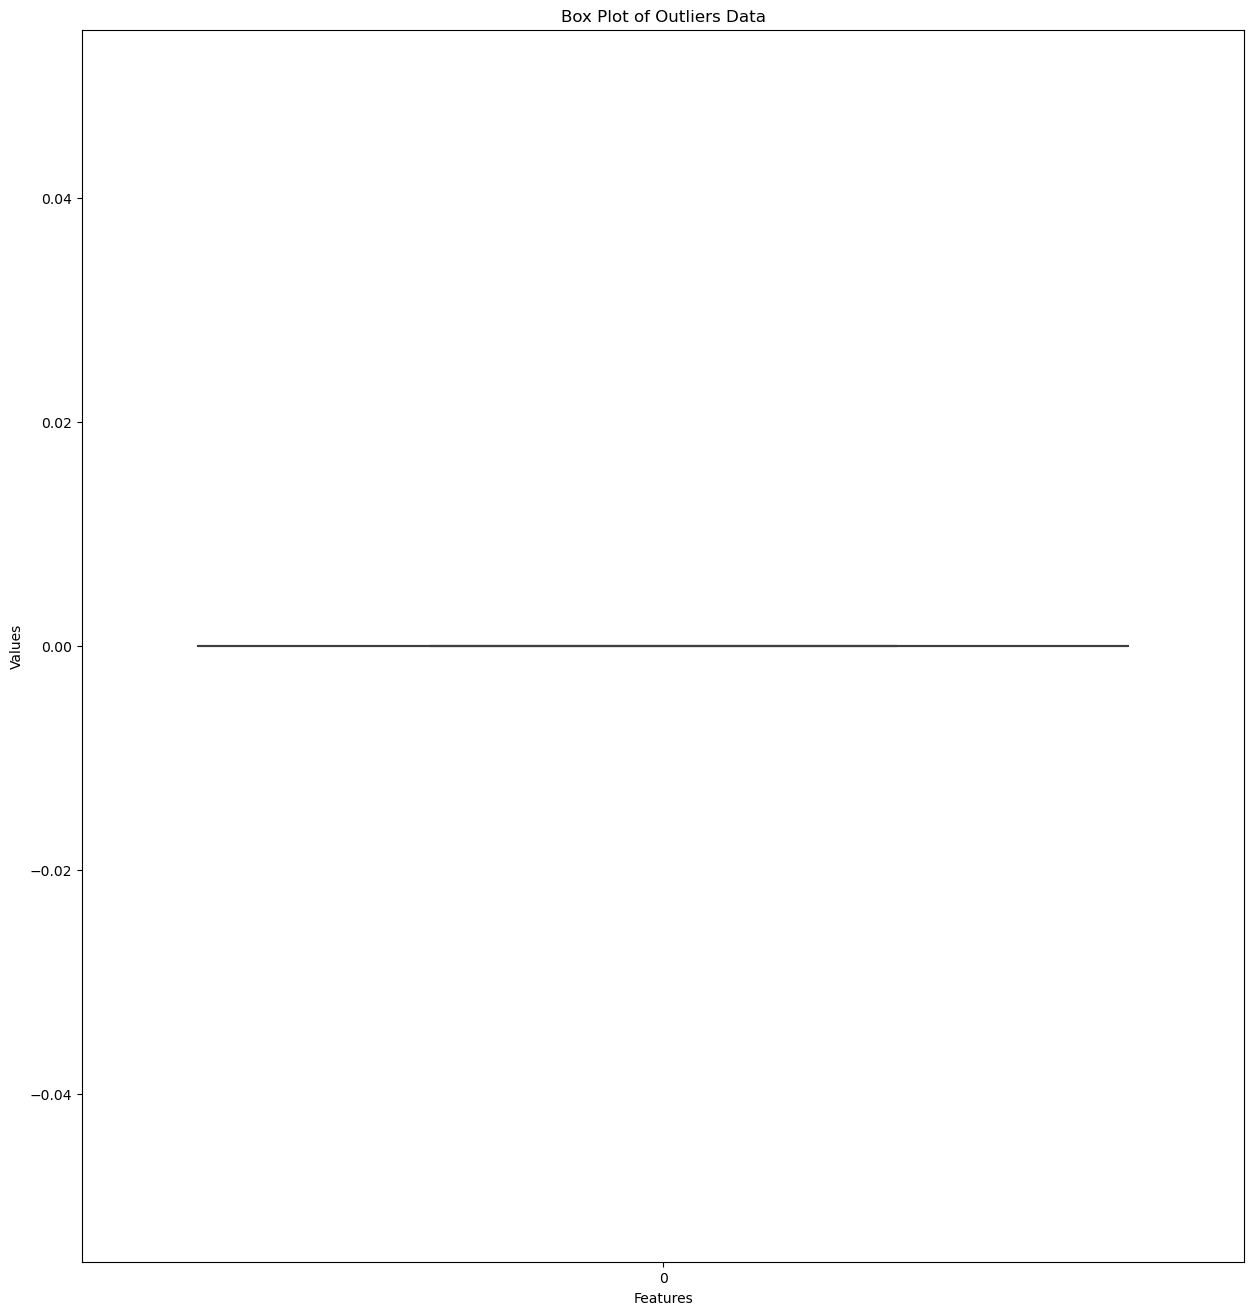

In [14]:
#Visualizing the Outliers
plt.figure(figsize=(15,16))
sns.boxplot(data=outliers)
plt.title('Box Plot of Outliers Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

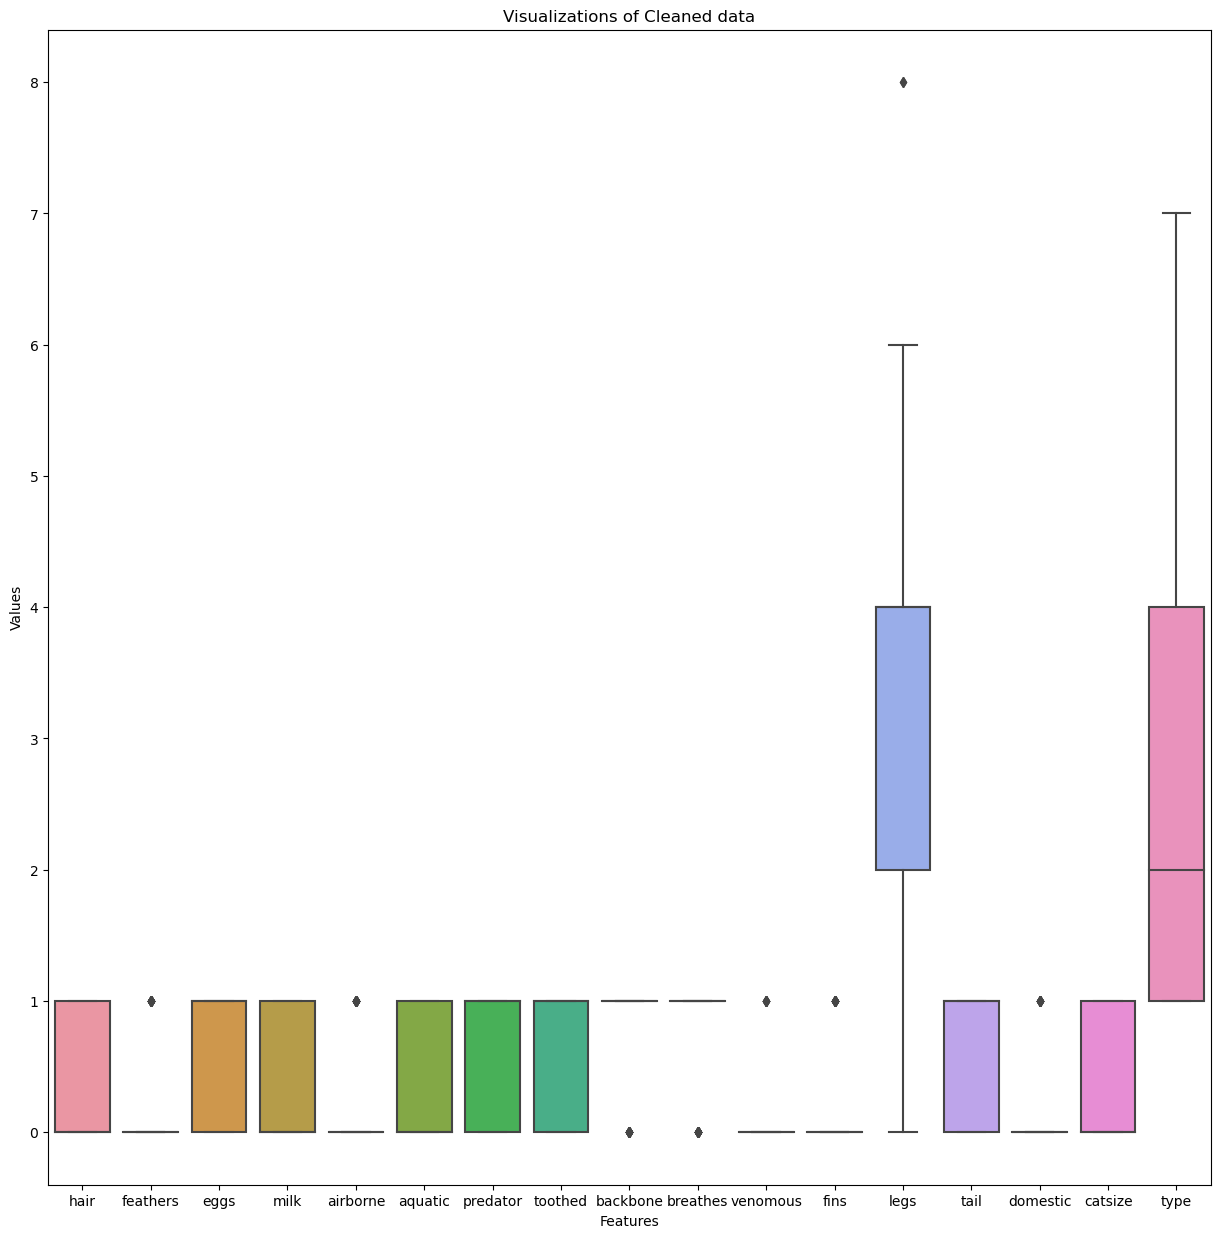

In [15]:
# visualize the cleaned data 
plt.figure(figsize=(15,15))
sns.boxplot(data=zoo_data)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title("Visualizations of Cleaned data")
plt.show()

In [16]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
features=zoo_data.drop("type",axis=1)
#features.fillna(features.mean())

In [18]:
target=zoo_data["type"]

In [19]:
# split into train & testing 
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)
#x_train=x_train.fillna(x_train.mean())
#x_test=x_test.fillna(x_test.mean())
#y_train=y_train.fillna(y_train.mean())
#y_test=y_test.fillna(y_test.mean())

In [20]:
# initialize the model 
knn_model=KNeighborsClassifier(n_neighbors=4,
    weights='uniform',
    leaf_size=30,)

# train the model 
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.2.2

In [ ]:
# predict the model 
y_pred_knn=knn_model.predict(x_test)

In [ ]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))